# Thompson Sampling

## Importing the libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [27]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [28]:
import random
N = 10000
d = 10
ads_selected = []
number_of_rewards = [0]*d
number_of_losses = [0]*d
total_reward = 0
for n in range(0,N):
  ad = 0
  max_random = 0
  for i in range(0,d):
    random_beta = random.betavariate(number_of_rewards[i] + 1, number_of_losses[i] + 1)
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    number_of_rewards[ad] = number_of_rewards[ad] + 1
  else:
    number_of_losses[ad] = number_of_losses[ad] + 1
  total_reward = total_reward + reward

## Visualising the results - Histogram

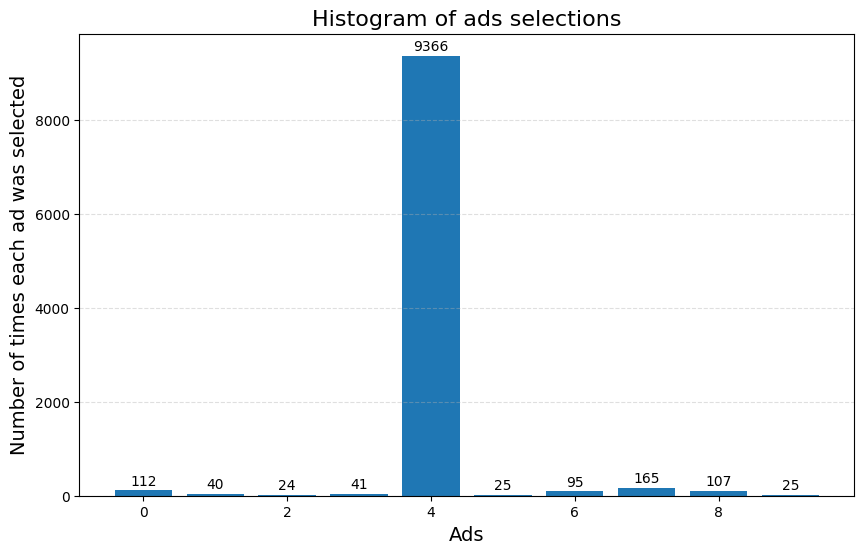

In [29]:
ads = np.arange(d)
counts = np.bincount(ads_selected, minlength=d)

plt.figure(figsize=(10, 6))
bars = plt.bar(ads, counts)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, yval,
             ha='center', va='bottom', fontsize=10)

plt.title("Histogram of ads selections", fontsize=16)
plt.xlabel("Ads", fontsize=14)
plt.ylabel("Number of times each ad was selected", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.show()


# Total Reward Progress

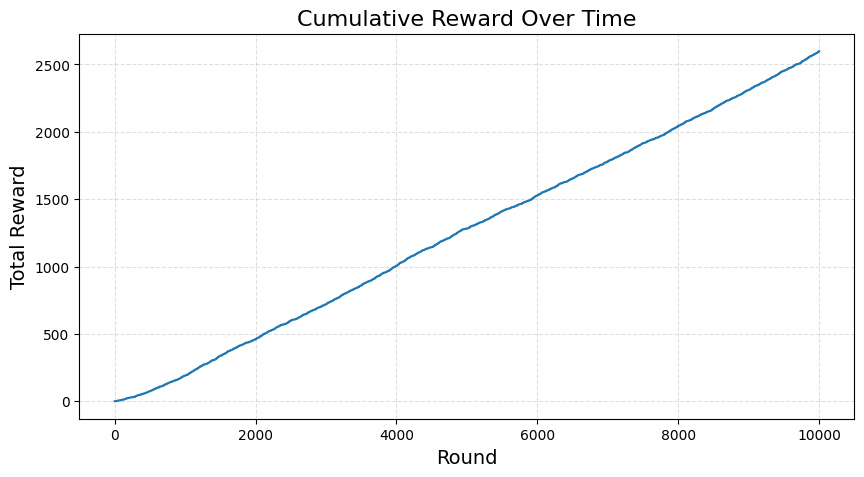

In [30]:
rewards = dataset.values[np.arange(N), ads_selected]

cumulative_reward = np.cumsum(rewards)

plt.figure(figsize=(10,5))
plt.plot(cumulative_reward)
plt.title("Cumulative Reward Over Time", fontsize=16)
plt.xlabel("Round", fontsize=14)
plt.ylabel("Total Reward", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.4)

plt.show()
